##### Some Theory
###### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent
###### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

##### How File I/O is done in most programming languages
- Open a file
- Read/Write data
- Close the file

In [1]:
## Writing to a file 

In [2]:
# Case 1 : if the file is not present

In [7]:
# Creation of file handler object
f = open('sample.txt','w')
f.write('Hi Happy to see you')
f.close()
# since file is closed, the write operation on file would not work
# f.write('hello')

In [9]:
# write multiple line strings
f = open('sample1.txt','w')
f.write('Hello world')
f.write('\nHow are you ?')
f.close()

In [11]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('Bill Gates')
f.close()

In [12]:
# How exactly open works?
# file is loaded in RAM within buffer memory from hard drive /rom
# Operations happen in ram within buffer memory

In [13]:
# Problem with w mode (replaces old value)
# introducing append mode
f = open('sample.txt','a')
f.write('\n I am fine Mr. Bill Gates')
f.close()

In [18]:
# Write lines
L = ['hello\n','hi\n','how are u\n','I am fine\n']
f = open('sample.txt','w')
f.writelines(L)
# it is a good idea to close because you will remove this file from memory(RAM)
# Memory efficient
# Safety
f.close()

In [19]:
# reading from files 
# --> using read()
f = open('sample.txt','r')
print(f.read())
f.close()

hello
hi
how are u
I am fine



In [23]:
# reading upto 8 charecters only

f = open('sample.txt','r')
print(f.read(8))
f.close()

hello
hi


In [27]:
# To read line by line
# When you have very big file , using readline is useful because then less data is loaded in memory
f = open('sample.txt','r')
print(f.readline(),end = '')
print(f.readline(),end= '')
f.close()

hello
hi


In [3]:
# reading entire using readline
f = open('sample.txt','r')
while True:
    data = f.readline()
    if data == '':
        break
    else:
        print(data,end = '')
f.close()

hello
hi
how are u
I am fine


##### Using Context Manager (With)
- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [9]:
with open('sample.txt','a') as f:
    f.write('This is a new line')

In [10]:
with open('sample.txt','r') as f:
    print(f.read(),end='')

hello
hi
how are u
I am fine
This is a new line

In [11]:
# moving within a file --> read 10 char then 10 char
with open('sample.txt','r') as f:
    print(f.read(10),end='')
    print(f.read(10),end='')

hello
hi
how are u
I

In [12]:
big_l = ['Hello world' for i in range(1000)]
with open('big.txt','w') as f:
    f.writelines(big_l)

In [18]:
with open('big.txt','r') as f:
    chunk_size = 10
    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size),end = '')
        f.read(chunk_size)

dHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wororldHello o worldHelello worldldHello woworldHellolo worldHeHello worlrldHello w worldHellllo worldHdHello wor

In [19]:
with open('sample.txt','r') as f:
    f.seek(5)
    print(f.read(10))
    print(f.tell())


hi
how ar
15


In [24]:
# reaching to the end of a file
with open('sample.txt','r') as f:
    while f.read() != '':
        continue
    else:
        print(f.tell())

47


In [25]:
with open('sample.txt','r') as f:
    f.seek(40)
    print(f.read(10))
    print(f.tell())

ew line
47


In [27]:
with open('sample.txt','w') as f:
    f.write('Hello')
    f.seek(0)
    f.write('Xa')

##### Problems with working in text mode
- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [29]:
# Working with binary file
with open('living.jpg','rb') as f:
    with open('screenshot.jpg','wb') as s:
        s.write(f.read())

In [31]:
# working with other data type
with open('sample.txt','w') as f:
    # f.write(5) int will not work
    f.write('5')

In [34]:
with open('sample.txt','r') as f:
    # f.write(5) int will not work
    # f.read() + 5
    f.read() + '5'

In [36]:
# More complex data type
d = {'name' : 'ipsita','age':33,'gender':'female'}
with open('sample.txt','w') as f:
    # f.write(d) cannot write dictionary
    f.write(str(d))

In [38]:
with open('sample.txt','r') as f:
    # print(dict(f.read())) cannot convert text to dictionary
    print(f.read())

{'name': 'ipsita', 'age': 33, 'gender': 'female'}


In [39]:
# Serialization and Deserialization

In [40]:
# Serialization : Process of converting python data type to JSON
# Deserialization : Process of converting JSON to python object
# JSON : Javascript object notation

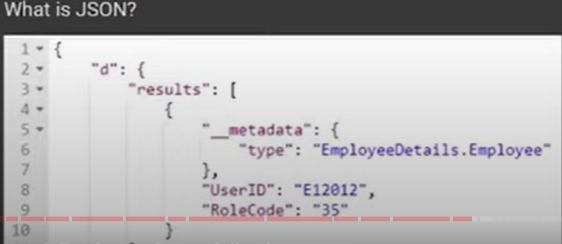

In [41]:
# serialization using json module
import json
l = [1,2,3,4]
with open('data.json','w') as f:
    json.dump(l,f)

In [42]:
with open('data.json','r') as f:
    print(json.load(f))

[1, 2, 3, 4]


In [43]:
# Dictionary 
d = {'name' : 'ipsita','age':33,'gender':'female'}
with open('data.json','w') as f:
    json.dump(d,f,indent = 4)

In [48]:
with open('data.json','r') as f:
    a = json.load(f)
    print(a)
    print(type(a))

{'name': 'ipsita', 'age': 33, 'gender': 'female'}
<class 'dict'>


In [50]:
# serialize and deserialize tuple
x = (1,2,3,4)
with open('data.json','w') as f:
    json.dump(x,f)
with open('data.json','r') as f:
    a = json.load(f)    
    print(a)

[1, 2, 3, 4]


In [56]:
d = {
    'name' : 'Ipsita Panda',
    'marks' : [89,90,78,99,88,95]
}
#serialization
with open('data.json','w') as f:
    json.dump(d,f)
# deserialization
with open('data.json','r') as f:
    a = json.load(f)
    print(a,type(a))

{'name': 'Ipsita Panda', 'marks': [89, 90, 78, 99, 88, 95]} <class 'dict'>


In [57]:
# Serializing and Deserializing Custom Objects
class Person:
    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender


In [58]:
person = Person('Ipsita','Panda',33,'Female')

In [61]:
import json
def show_obj(person):
    if isinstance(person,Person):
        return '{} {} , age --> {},gender --> {}'.format(person.fname,person.lname,person.age,person.gender)
with open('data.json','w') as f:
    json.dump(person,f,default = show_obj)

In [62]:
# As a dict
import json
def show_obj(person):
    if isinstance(person,Person):
        return {'name' : person.fname +' '+person.lname,'age' : person.age,'gender' : person.gender}
with open('data.json','w') as f:
    json.dump(person,f,default = show_obj)
with open('data.json','r') as f:
    print(json.load(f))

{'name': 'Ipsita Panda', 'age': 33, 'gender': 'Female'}


##### Pickling
Pickling is the process whereby a Python object hierarchy is converted into a byte stream, and unpickling is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [63]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def display_info(self):
        print('Hi ! My name is',self.name,'and my age is ',self.age,' years old')

In [64]:
p = Person('Ipsita',33)

In [65]:
p.display_info()

Hi ! My name is Ipsita and my age is  33  years old


In [68]:
import pickle
with open('person.pkl','wb') as f:
    pickle.dump(p,f)
with open('person.pkl','rb') as f:
    a = pickle.load(f)

In [69]:
a.display_info()

Hi ! My name is Ipsita and my age is  33  years old
